In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
import numpy as np

data = pd.read_csv("NDVI_Biomass.csv")
data.head(5)

,Biomass,NDVI
0,3973,0.604550
1,2132,0.784428
2,6139,0.849093
3,4110,0.546335
4,2506,0.852595


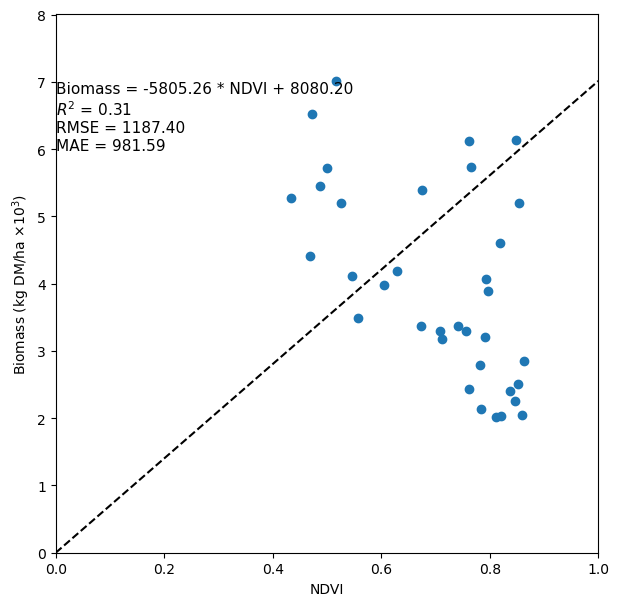

In [2]:
fig, ax = plt.subplots(figsize=[7, 7])

# Scatter plot for NDVI vs Biomass
ax.scatter(data['NDVI'], data['Biomass'] / 1000)  # Dividing Biomass by 1000 to convert to thousands

# Set x-axis limits for NDVI and y-axis limits for Biomass (in thousands)
ax.set_xlim([0, 1])  # Assuming NDVI ranges from 0 to 1
ax.set_ylim([0, max(data['Biomass']) / 1000 + 1])  # Adding 1 just to give some space on the plot

# You don't need to set aspect to 'equal' because the units of NDVI and Biomass are different
# ax.set_aspect('equal')  # This line can be removed

# Add x-axis and y-axis labels
ax.set_xlabel('NDVI')
ax.set_ylabel(r'Biomass (kg DM/ha $\times 10^3$)')

# Add 1:1 line to the plot (modify the limits according to your data range)
ax.plot([0, 1], [0, max(data['Biomass']) / 1000], color='black', linestyle='--') # This line might not be needed

# Get the regression equation and R squared value
x = data['NDVI']
y = data['Biomass']
model = LinearRegression().fit(x.values.reshape(-1,1), y)

# Obtain the coefficient and intercept
coeff = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(x.values.reshape(-1,1), y)
rmse = np.sqrt(mean_squared_error(y, model.predict(x.values.reshape(-1,1))))
mae = mean_absolute_error(y, model.predict(x.values.reshape(-1,1)))

eqn = f'Biomass = {coeff:.2f} * NDVI + {intercept:.2f}'
r2 = f'$R^2$ = {r_squared:.2f}'
#sample_size = f'Sample Size = {len(data)}'
rmse_text = f'RMSE = {rmse:.2f}'
mae_text = f'MAE = {mae:.2f}'

# Add the equation, R squared value, and other information to the plot
info_text = f'{eqn}\n{r2}\n{rmse_text}\n{mae_text}'
# Position the text in the top left corner of the plot
ax.text(0, max(data['Biomass']) / 1000, info_text, fontsize=11, 
        verticalalignment='top', horizontalalignment='left')

plt.show()

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
import numpy as np

data = pd.read_csv("NDVI_Biomass.csv")
data.head(5)

,Biomass,NDVI
0,3973,0.604550
1,2132,0.784428
2,6139,0.849093
3,4110,0.546335
4,2506,0.852595


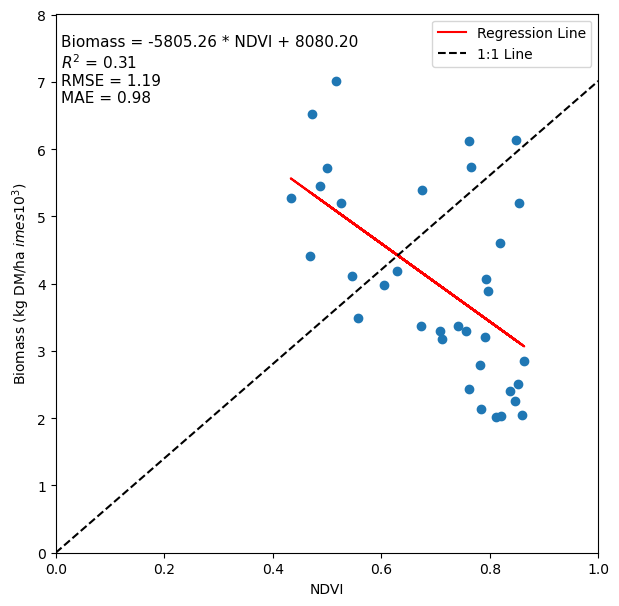

In [4]:
fig, ax = plt.subplots(figsize=[7, 7])

# Scatter plot for NDVI vs Biomass
ax.scatter(data['NDVI'], data['Biomass'] / 1000)  # Dividing Biomass by 1000 to convert to thousands

# Set the axis labels
ax.set_xlabel('NDVI')
ax.set_ylabel('Biomass (kg DM/ha $\times 10^3$)')

# Perform Linear Regression
x = data['NDVI'].values.reshape(-1, 1)
y = data['Biomass'].values
model = LinearRegression().fit(x, y)

# Calculate the regression line
regression_line_y = model.predict(x)

# Plot the regression line
ax.plot(data['NDVI'], regression_line_y / 1000, color='red', label='Regression Line')

# Add the 1:1 line
ax.plot([0, 1], [0, max(data['Biomass']) / 1000], color='black', linestyle='--', label='1:1 Line')

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(data['Biomass']) / 1000 + 1])

# Calculate R squared, RMSE, and MAE
r_squared = model.score(x, y)
rmse = np.sqrt(mean_squared_error(y, model.predict(x)))
mae = mean_absolute_error(y, model.predict(x))

# Add text with the regression equation and performance metrics
eqn_text = f'Biomass = {model.coef_[0]:.2f} * NDVI + {model.intercept_:.2f}'
performance_text = f'$R^2$ = {r_squared:.2f}\nRMSE = {rmse/1000:.2f}\nMAE = {mae/1000:.2f}'
ax.text(0.01, max(data['Biomass']) / 1000 * 1.1, f'{eqn_text}\n{performance_text}', fontsize=11, 
        verticalalignment='top', horizontalalignment='left')

# Show the plot with a legend
ax.legend()
plt.show()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
import numpy as np

data = pd.read_csv("NDVI_Biomass.csv")
data.head(5)



,Biomass,NDVI
0,3973,0.604550
1,2132,0.784428
2,6139,0.849093
3,4110,0.546335
4,2506,0.852595


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


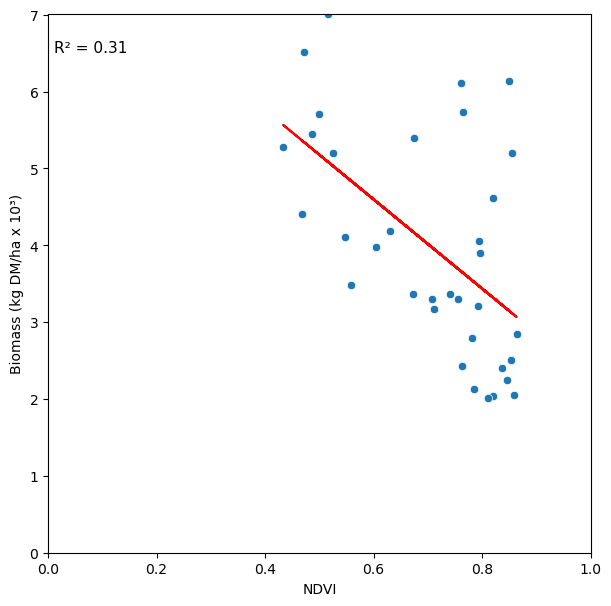

In [6]:

# Perform Linear Regression
x = data['NDVI'].values.reshape(-1, 1)
y = data['Biomass'].values
model = LinearRegression().fit(x, y)

# Predict the Biomass using the model for the line
predictions = model.predict(x)

# Calculate R squared
r_squared = model.score(x, y)

# Create the scatter plot, ensuring that the 'Biomass' data is divided by 1000
fig, ax = plt.subplots(figsize=[7, 7])
sns.scatterplot(x='NDVI', y=data['Biomass'] / 1000, data=data, ax=ax)

# Plot the regression line
ax.plot(data['NDVI'], predictions / 1000, color='red')

# Set the axis labels
ax.set_xlabel('NDVI')
ax.set_ylabel('Biomass (kg DM/ha x 10³)')  # Using 'x' for multiplication symbol

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(data['Biomass']) / 1000])

# Add text with only the R squared value
ax.text(0.01, max(data['Biomass']) / 1000 * 0.95, f'R² = {r_squared:.2f}', fontsize=11,
        verticalalignment='top', horizontalalignment='left')

# Remove the legend if it's not needed
ax.legend().remove()
#ax.set_ylim([0, (max(data['Biomass']) / 1000) + 1])

plt.show()


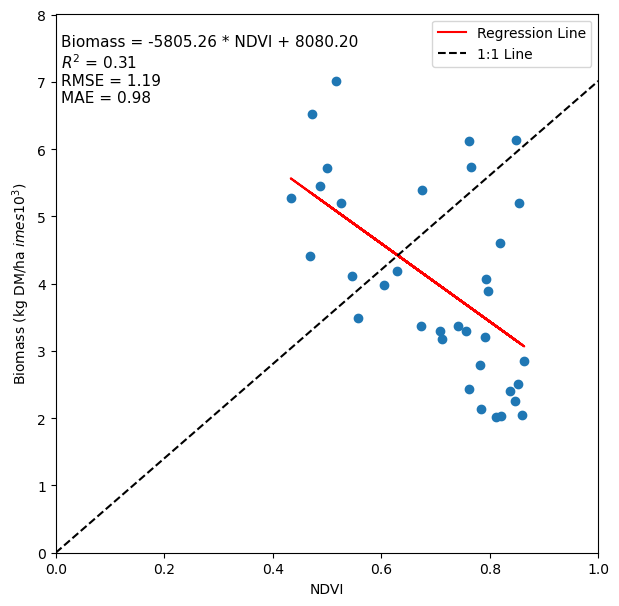

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
import numpy as np

fig, ax = plt.subplots(figsize=[7, 7])

# Scatter plot for NDVI vs Biomass
ax.scatter(data['NDVI'], data['Biomass'] / 1000)  # Dividing Biomass by 1000 to convert to thousands

# Set the axis labels
ax.set_xlabel('NDVI')
ax.set_ylabel('Biomass (kg DM/ha $\times 10^3$)')

# Perform Linear Regression
x = data['NDVI'].values.reshape(-1, 1)
y = data['Biomass'].values
model = LinearRegression().fit(x, y)

# Calculate the regression line
regression_line_y = model.predict(x)

# Plot the regression line
ax.plot(data['NDVI'], regression_line_y / 1000, color='red', label='Regression Line')

# Add the 1:1 line
ax.plot([0, 1], [0, max(data['Biomass']) / 1000], color='black', linestyle='--', label='1:1 Line')

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(data['Biomass']) / 1000 + 1])

# Calculate R squared, RMSE, and MAE
r_squared = model.score(x, y)
rmse = np.sqrt(mean_squared_error(y, model.predict(x)))
mae = mean_absolute_error(y, model.predict(x))

# Add text with the regression equation and performance metrics
eqn_text = f'Biomass = {model.coef_[0]:.2f} * NDVI + {model.intercept_:.2f}'
performance_text = f'$R^2$ = {r_squared:.2f}\nRMSE = {rmse/1000:.2f}\nMAE = {mae/1000:.2f}'
ax.text(0.01, max(data['Biomass']) / 1000 * 1.1, f'{eqn_text}\n{performance_text}', fontsize=11, 
        verticalalignment='top', horizontalalignment='left')

# Show the plot with a legend
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


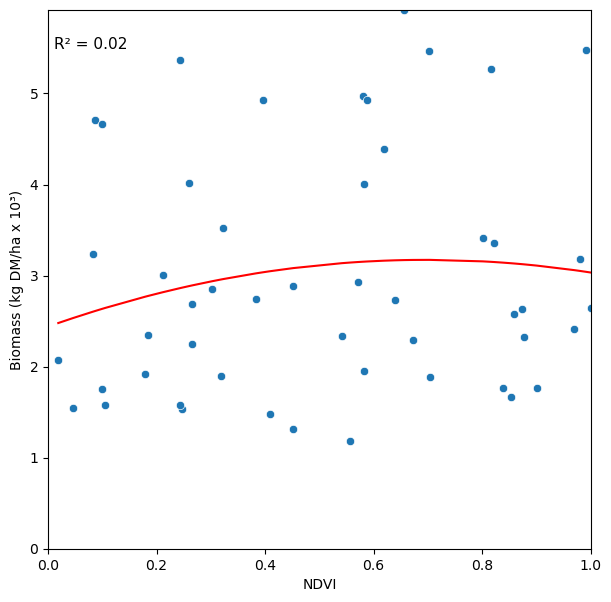

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (using your provided example)
data = {
    'NDVI': np.random.rand(50),
    'Biomass': np.random.rand(50) * 5000 + 1000  # Simulated data
}

df = pd.DataFrame(data)

# Define the degree of the polynomial
degree = 2  # You can change this to fit different polynomial degrees

# Prepare the data
x = df['NDVI'].values.reshape(-1, 1)
y = df['Biomass'].values

# Transform the features to polynomial features
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x)

# Perform polynomial regression
model_poly = LinearRegression().fit(x_poly, y)

# Predict the Biomass using the polynomial model
predictions_poly = model_poly.predict(x_poly)

# Calculate R squared for the polynomial model
r_squared_poly = model_poly.score(x_poly, y)

# Create the scatter plot, ensuring that the 'Biomass' data is divided by 1000
fig, ax = plt.subplots(figsize=[7, 7])
sns.scatterplot(x='NDVI', y=df['Biomass'] / 1000, data=df, ax=ax)

# Plot the polynomial regression line
sorted_zip = sorted(zip(df['NDVI'], predictions_poly))
x_poly_sorted, predictions_poly_sorted = zip(*sorted_zip)
ax.plot(x_poly_sorted, np.array(predictions_poly_sorted) / 1000, color='red')

# Set the axis labels
ax.set_xlabel('NDVI')
ax.set_ylabel('Biomass (kg DM/ha x 10³)')  # Using 'x' for multiplication symbol

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(df['Biomass']) / 1000])

# Add text with only the R squared value for the polynomial model
ax.text(0.01, max(df['Biomass']) / 1000 * 0.95, f'R² = {r_squared_poly:.2f}', fontsize=11,
        verticalalignment='top', horizontalalignment='left')

# Remove the legend if it's not needed
ax.legend().remove()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


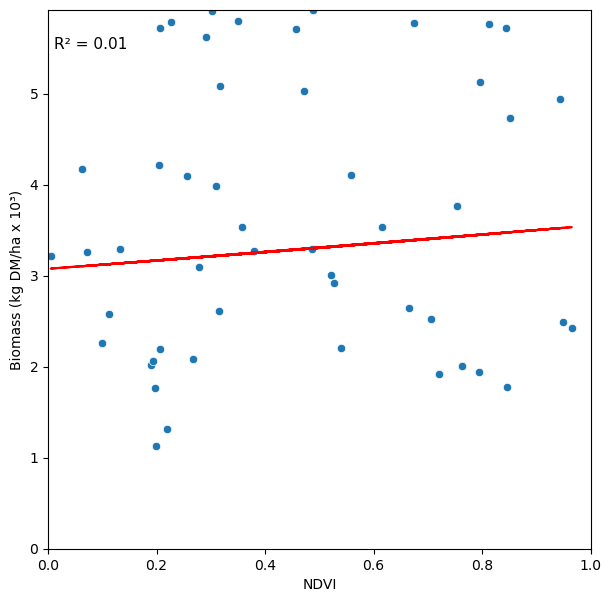

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (using your provided example)
data = {
    'NDVI': np.random.rand(50),
    'Biomass': np.random.rand(50) * 5000 + 1000  # Simulated data
}

df = pd.DataFrame(data)

# Apply log transformation to the biomass data
df['Log_Biomass'] = np.log(df['Biomass'])

# Perform Linear Regression
x = df['NDVI'].values.reshape(-1, 1)
y = df['Log_Biomass'].values
model = LinearRegression().fit(x, y)

# Predict the Biomass using the model for the line
predictions_log = model.predict(x)

# Convert predictions back to the original scale
predictions = np.exp(predictions_log)

# Calculate R squared
r_squared = model.score(x, y)

# Create the scatter plot, ensuring that the 'Biomass' data is divided by 1000
fig, ax = plt.subplots(figsize=[7, 7])
sns.scatterplot(x='NDVI', y=df['Biomass'] / 1000, data=df, ax=ax)

# Plot the regression line
ax.plot(df['NDVI'], predictions / 1000, color='red')

# Set the axis labels
ax.set_xlabel('NDVI')
ax.set_ylabel('Biomass (kg DM/ha x 10³)')  # Using 'x' for multiplication symbol

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(df['Biomass']) / 1000])

# Add text with only the R squared value
ax.text(0.01, max(df['Biomass']) / 1000 * 0.95, f'R² = {r_squared:.2f}', fontsize=11,
        verticalalignment='top', horizontalalignment='left')

# Remove the legend if it's not needed
ax.legend().remove()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


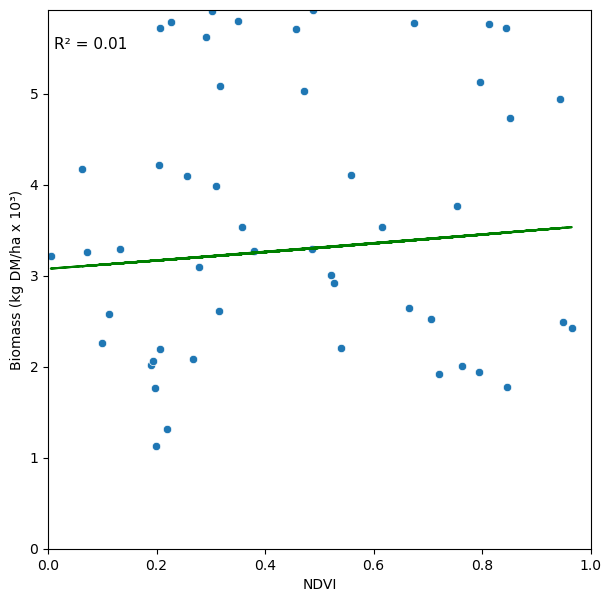

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the NDVI values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform Linear Regression on standardized NDVI values
model_standardized = LinearRegression().fit(x_scaled, y)

# Predict the Biomass using the standardized model for the line
predictions_log_standardized = model_standardized.predict(x_scaled)

# Convert predictions back to the original scale
predictions_standardized = np.exp(predictions_log_standardized)

# Calculate R squared for the standardized model
r_squared_standardized = model_standardized.score(x_scaled, y)

# Create the scatter plot, ensuring that the 'Biomass' data is divided by 1000
fig, ax = plt.subplots(figsize=[7, 7])
sns.scatterplot(x='NDVI', y=df['Biomass'] / 1000, data=df, ax=ax)

# Plot the regression line for the standardized model
ax.plot(df['NDVI'], predictions_standardized / 1000, color='green')

# Set the axis labels
ax.set_xlabel('NDVI')
ax.set_ylabel('Biomass (kg DM/ha x 10³)')  # Using 'x' for multiplication symbol

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(df['Biomass']) / 1000])

# Add text with only the R squared value
ax.text(0.01, max(df['Biomass']) / 1000 * 0.95, f'R² = {r_squared_standardized:.2f}', fontsize=11,
        verticalalignment='top', horizontalalignment='left')

# Remove the legend if it's not needed
ax.legend().remove()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


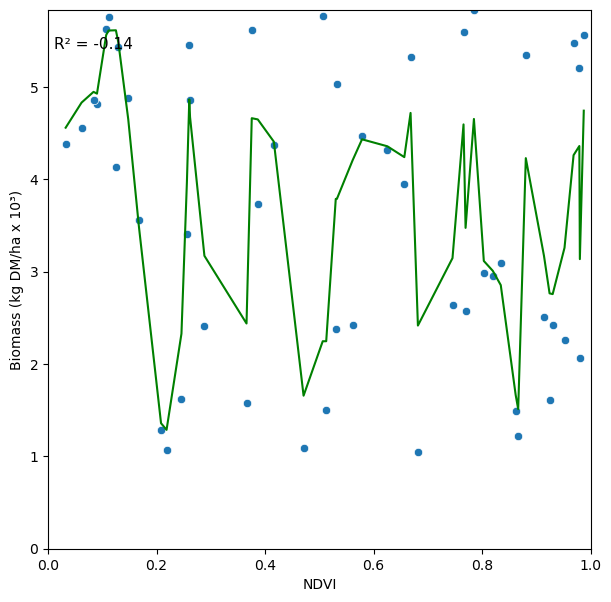

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (using your provided example)
data = {
    'NDVI': np.random.rand(50),
    'Biomass': np.random.rand(50) * 5000 + 1000  # Simulated data
}

df = pd.DataFrame(data)

# Prepare the data
x = df['NDVI'].values.reshape(-1, 1)
y = df['Biomass'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

# Predict the Biomass using the Random Forest model
predictions_rf = model_rf.predict(x_test)

# Calculate R squared
r_squared_rf = model_rf.score(x_test, y_test)

# Create the scatter plot, ensuring that the 'Biomass' data is divided by 1000
fig, ax = plt.subplots(figsize=[7, 7])
sns.scatterplot(x='NDVI', y=df['Biomass'] / 1000, data=df, ax=ax)

# Plot the regression line for the Random Forest model
sorted_zip = sorted(zip(df['NDVI'], model_rf.predict(x)))
x_rf_sorted, predictions_rf_sorted = zip(*sorted_zip)
ax.plot(x_rf_sorted, np.array(predictions_rf_sorted) / 1000, color='green')

# Set the axis labels
ax.set_xlabel('NDVI')
ax.set_ylabel('Biomass (kg DM/ha x 10³)')  # Using 'x' for multiplication symbol

# Set x and y limits
ax.set_xlim([0, 1])
ax.set_ylim([0, max(df['Biomass']) / 1000])

# Add text with only the R squared value
ax.text(0.01, max(df['Biomass']) / 1000 * 0.95, f'R² = {r_squared_rf:.2f}', fontsize=11,
        verticalalignment='top', horizontalalignment='left')

# Remove the legend if it's not needed
ax.legend().remove()

plt.show()
